# ACCESS TO THE KAGGLE DATA

In [ ]:
#!pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle 

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=b5702de6acaa75a6337c44a91d94a1c4c5666869c82666e97d0f29acb2543eed
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
#Load the kaggle.json file in "Select.fichiers" so we get the access to the kaggle Dataset

from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"inesbelhajmessaoud","key":"99495bddf35fb5812ef5f30c50d7bb5d"}'}

In [ ]:
#create a kaggle folder 
! mkdir ~/.kaggle

#copy the kaggle.json to the kaggle folder
! cp kaggle.json ~/.kaggle/

#permission for the kaggle.json to act
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#Check all the available updated kaggle dataset 

!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18437       1431  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11114        782  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5683        365  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

# Download the POEM DATASET

In [ ]:
#Download our poems dataset

! kaggle datasets download michaelarman/poemsdataset

 58% 9.00M/15.5M [00:00<00:00, 17.0MB/s]
100% 15.5M/15.5M [00:00<00:00, 27.1MB/s]


In [ ]:
#Create a folder data1 where we are going to download all the unziped files from the dataset
!mkdir data1

In [ ]:
#unzip all the folders of our dataset
!unzip poemsdataset.zip -d "/content/data1"

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/data1/topics/poetry/PoetryPoemsReadPoetryUnderstandPoetryPoembyGajananMishra.txt  
  inflating: /content/data1/topics/poetry/PoetryPoemsSomeLikePoetryPoembyWislawaSzymborska.txt  
  inflating: /content/data1/topics/poetry/PoetryPoemsSpiritOfPoetryThePoembyHenryWadsworthLongfellow.txt  
  inflating: /content/data1/topics/poetry/PoetryPoemsTheHallmarkOfPoetryPoembyMichaelShepherd.txt  
  inflating: /content/data1/topics/poetry/PoetryPoemsTheNeversOfPoetryPoembyCharlesHarpur.txt  
  inflating: /content/data1/topics/poetry/PoetryPoemsThePoetryOfLifePoembyFriedrichSchiller.txt  
  inflating: /content/data1/topics/poetry/PoetryPoemsTheProgressOfPoetryPoembyJonathanSwift.txt  
  inflating: /content/data1/topics/poetry/PoetryPoemsTheThreehundredthMilestoneOfThePoetryGravelRoadPoembynimaldunuhinga.txt  
  inflating: /content/data1/topics/poetry/PoetryPoemsTheUsesOfPoetryPoembyWilliamCarlosWilliam

# DATA EXPLOARATION AND VISUALIZATION

In [ ]:
#Import tensorflow tools 

from tensorflow.keras.preprocessing.sequence import pad_sequences #pad_sequences will be used to get sure that all the sequences of a list have the same length.

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional #will be used for building the layers of the RNN model
from tensorflow.keras.preprocessing.text import Tokenizer #will be used to tockenize our text documents
from tensorflow.keras.models import Sequential #For model building 
from tensorflow.keras.optimizers import Adam # the ADAM optimization algorithm 
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob, os 

In [ ]:

num_forms=0

#check the total number of poems in the forms folder of our dataset
for path, currentDirectory, files in os.walk("/content/data1/forms"):
    for file in files:
        if file.endswith(".txt"):
           num_forms=num_forms+1
print("There are",num_forms ,"poems in the forms folder")

num_topics=0
#check the total number of poems in the topics folder of our dataset

for path, currentDirectory, files in os.walk("/content/data1/topics"):
    for file in files:
        if file.endswith(".txt"):
           num_topics=num_topics+1

print("There are",num_topics ,"poems in the topics folder")

#check the total number of poems in our dataset     
print("There are a total of",num_forms+num_topics ,"poems in the dataset")    

There are 6322 poems in the forms folder
There are 14334 poems in the topics folder
There are a total of 20656 poems in the dataset


In [ ]:
#change the worrking directory to data1 folder

%cd /content/data1

/content/data1


In [ ]:


#Create a text file that contains all the poems of category 'happy' and 'happiness in the topics folder of our dataset 
%%writefile happiness_poems.txt
Title : A happy poem


Writing happiness_poems.txt


In [ ]:

#Check the number of poems of category "happiness"
i=0

for dirname, dirnames, filenames in os.walk('/content/data1/topics/happiness'):
    if dirname == '/content/data1/topics/happiness':
          for f in filenames :
           if f.endswith('.txt'):
            i=i+1
print("The number of poems of category happiness is",i)
           

The number of poems of category happiness is 100


In [ ]:
#Check the number of poems of category "happy" (There are two separte categories "happiness" and "happy" in the topics folder of our dataset)
i=0

for dirname, dirnames, filenames in os.walk('/content/data1/topics/happy'):
    if dirname == '/content/data1/topics/happy':
          for f in filenames :
           if f.endswith('.txt'):
            i=i+1
print("The number of poems of category happy is",i)

The number of poems of category happy is 100


In [ ]:
#gather all the poems of category "happiness" in one text file to visualize it later

L=[]
for filename in glob.glob('/content/data1/topics/happiness/HappinessPoems*.txt'):
   with open(os.path.join(os.getcwd(), filename), 'r') as f:
       text = f.readlines()
   L.append(text)

In [ ]:
#Add all the poems of category "happy" in the happiness_poems.txt file

for filename in glob.glob('/content/data1/topics/happiness/HappyPoems*.txt'):
   with open(os.path.join(os.getcwd(), filename), 'r') as f:
       text = f.readlines()
   L.append(text)

In [ ]:
#L is the list that contains all the poems of the two categories "happiness" and "happy" 
L

[['Happy is the one,\n',
  'and happy is he alone\n',
  'who can truly call\n',
  'today his very own\n',
  'he who can boldly\n',
  'stand up and say\n',
  'tomorrow come\n',
  'and do what you may\n',
  'I have lived the best today'],
 ['Sharing each other’s hopes and dreams.\n',
  'Caring about what happens to each other.\n',
  'Respecting each other’s goals and ambitions.\n',
  'Committing to share everything with each other.\n',
  'Making decisions together like all good teams do.\n',
  'Being there for the bad times as well as the good.\n',
  'Trusting the other to do the right thing in the relationship.\n',
  'Knowing each other so well that reacting becomes instinctive.\n',
  'Believing the whole relationship is the sum of two halves together.\n',
  'Loving each other for person they are, not the person they could be.'],
 ['A babe’s first cry, as she enters the world\n',
  'Sobs of delight, greet this miracle of life\n',
  'A child’s happy laugh, running free\n',
  'Gasps of wo

In [ ]:
#Delete the current content of the text file created "happiness_poems.txt"
for filename in glob.glob('/content/data1/happiness_poems.txt'):
   with open(os.path.join(os.getcwd(), filename), 'r+') as f:
     f.truncate(0)
     i=0


#Load all the elements of the list L to list L1 and then write the full text in happiness_poems.txt
for filename in glob.glob('/content/data1/happiness_poems.txt'):
   with open(os.path.join(os.getcwd(), filename), 'a') as f:
     f.truncate(0)
     L1=[]
     for element in L:
       L1.append(element)
       f.writelines(L1[i])
       i=i+1
     
  

In [ ]:

L1

[['Happy is the one,\n',
  'and happy is he alone\n',
  'who can truly call\n',
  'today his very own\n',
  'he who can boldly\n',
  'stand up and say\n',
  'tomorrow come\n',
  'and do what you may\n',
  'I have lived the best today'],
 ['Sharing each other’s hopes and dreams.\n',
  'Caring about what happens to each other.\n',
  'Respecting each other’s goals and ambitions.\n',
  'Committing to share everything with each other.\n',
  'Making decisions together like all good teams do.\n',
  'Being there for the bad times as well as the good.\n',
  'Trusting the other to do the right thing in the relationship.\n',
  'Knowing each other so well that reacting becomes instinctive.\n',
  'Believing the whole relationship is the sum of two halves together.\n',
  'Loving each other for person they are, not the person they could be.'],
 ['A babe’s first cry, as she enters the world\n',
  'Sobs of delight, greet this miracle of life\n',
  'A child’s happy laugh, running free\n',
  'Gasps of wo

In [ ]:
# Read then decode.
text = open(/content/data1/happiness_poems.txt, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

In [ ]:
#The tockenizer's role in our case is splitting an entire text document into separate words.
tokenizer = Tokenizer()
data_example = open('/content/data1/happiness_poems.txt').read()


#divide the poem line by line
corpus_example = data_example.lower().split("\n")
tokenizer.fit_on_texts(corpus_example)
total_words = len(tokenizer.word_index) + 1

# Create a list of initial sequences
input_sequences = []
for line in corpus_example:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# create pad sequences to extract the most present words in the poems 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
data_example

"Happy is the one,\nand happy is he alone\nwho can truly call\ntoday his very own\nhe who can boldly\nstand up and say\ntomorrow come\nand do what you may\nI have lived the best todaySharing each other’s hopes and dreams.\nCaring about what happens to each other.\nRespecting each other’s goals and ambitions.\nCommitting to share everything with each other.\nMaking decisions together like all good teams do.\nBeing there for the bad times as well as the good.\nTrusting the other to do the right thing in the relationship.\nKnowing each other so well that reacting becomes instinctive.\nBelieving the whole relationship is the sum of two halves together.\nLoving each other for person they are, not the person they could be.A babe’s first cry, as she enters the world\nSobs of delight, greet this miracle of life\nA child’s happy laugh, running free\nGasps of wonder, on making a discovery\nThat shy winsome giggle, on a first date\nSilent conversations that leap beyond fate\nA moan of delight whe

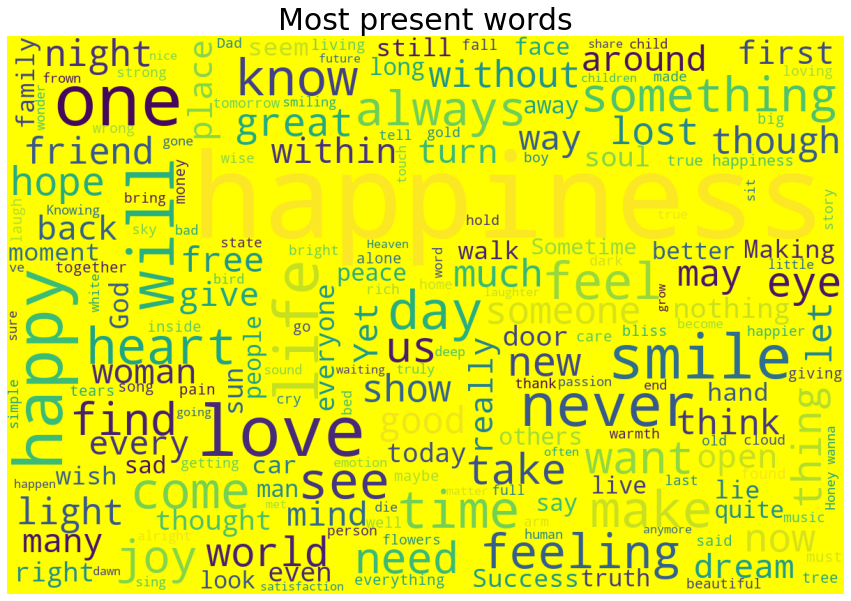

In [ ]:
# let's see the words cloud for the reviews 

# most popular drugs

import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)


wordcloud = WordCloud(background_color = 'yellow', stopwords = stopwords, width = 1200, height = 800).generate(data_example)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Most present words', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

**Bag of words**

# Building an LSTM MODEL 

In [ ]:
#The architecture of our LSTM model

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           252900    
                                                                 
 bidirectional (Bidirectiona  (None, 25, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1264)              127664    
                                                                 
 dense_1 (Dense)             (None, 2529)              3199185   
                                                        

**Training our Model**

In [ ]:
#training our model with 300 epochs

history = model.fit(predictors, label, epochs=300, verbose=1)

Epoch 1/300
290/290 [==============================] - 51s 156ms/step - loss: 6.9160 - accuracy: 0.0324
Epoch 2/300
290/290 [==============================] - 45s 156ms/step - loss: 6.3303 - accuracy: 0.0344
Epoch 3/300
290/290 [==============================] - 45s 155ms/step - loss: 6.1822 - accuracy: 0.0376
Epoch 4/300
290/290 [==============================] - 45s 156ms/step - loss: 6.0663 - accuracy: 0.0429
Epoch 5/300
290/290 [==============================] - 45s 157ms/step - loss: 5.9885 - accuracy: 0.0489
Epoch 6/300
290/290 [==============================] - 46s 157ms/step - loss: 5.9210 - accuracy: 0.0516
Epoch 7/300
290/290 [==============================] - 45s 156ms/step - loss: 5.8571 - accuracy: 0.0563
Epoch 8/300
290/290 [==============================] - 45s 156ms/step - loss: 5.7910 - accuracy: 0.0560
Epoch 9/300
290/290 [==============================] - 45s 156ms/step - loss: 5.7535 - accuracy: 0.0626
Epoch 10/300
290/290 [==============================] - 46s 157m

In [ ]:
print("Model Accuracy: "+str(history.history['accuracy'][len(history.history['accuracy'])-1]))
print("Model Loss: "+str(history.history['loss'][len(history.history['loss'])-1]))

Model Accuracy: 0.8197411298751831
Model Loss: 0.7615565657615662


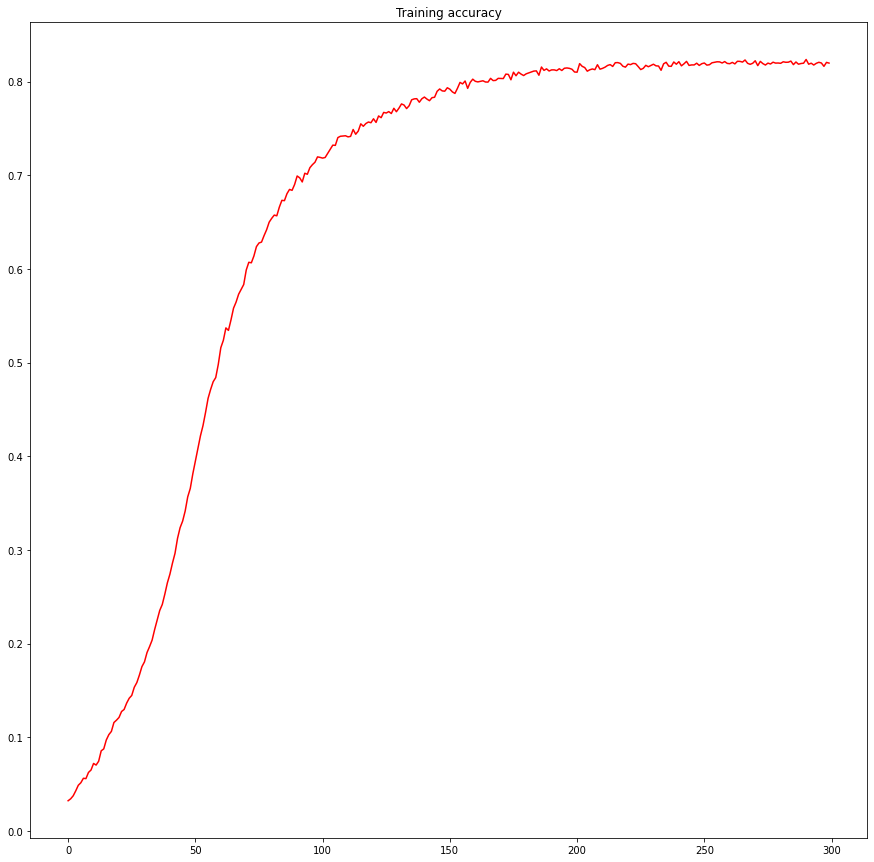

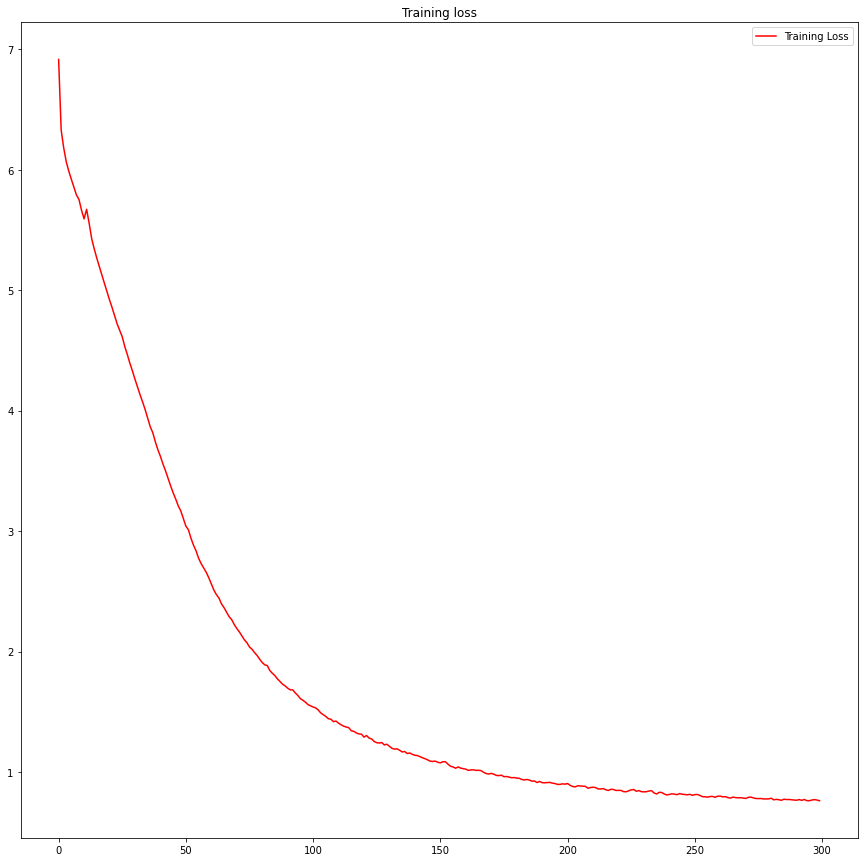

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

**Testing our Model**

In [ ]:
#choose a seed text as a title for a given first sequence.



seed_text = "To feel your joy"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    prediction=model.predict(token_list) 
    predicted=np.argmax(prediction,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

**Saving the Model**

In [ ]:
model.save('Poems_generator.h5')

In [ ]:
from tensorflow.keras.models import load_model

Loading the saved model

In [ ]:
literature_gen = load_model('./Poems_generator.h5')

**Testing the saved model**

In [ ]:
#choose a seed text as a title for a given first sequence.

seed_text = "Please be happy"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    prediction=literature_gen.predict(token_list) 
    predicted=np.argmax(prediction,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)